# Springboard Apps project - Tier 3 - Complete

**Brief**

Did Apple Store apps receive better reviews than Google Play apps?

## Stages of the project

1. Sourcing and loading 
    * Load the two datasets
    * Pick the columns that we are going to work with 
    * Subsetting the data on this basis 
 
 
2. Cleaning, transforming and visualizing
    * Check the data types and fix them
    * Add a `platform` column to both the `Apple` and the `Google` dataframes
    * Changing the column names to prepare for a join 
    * Join the two data sets
    * Eliminate the `NaN` values
    * Filter only those apps that have been reviewed at least once
    * Summarize the data visually and analytically (by the column `platform`)  
  
  
3. Modelling 
    * Hypothesis formulation
    * Getting the distribution of the data
    * Permutation test 


4. Evaluating and concluding 
    * What is our conclusion?
    * What is our decision?
    * Other models we could have used. 
    

## Importing the libraries

Import pandas, numpy, scipy, random and matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

## Stage 1 -  Sourcing and loading data

### 1a. Source and load the data
Download the data from Kaggle. The data from the Apple Store can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and the data from Google Store can be found [here](https://www.kaggle.com/lava18/google-play-store-apps).

In [2]:
# Load Google Store data into google
path = '/Users/robertspoonmore/Desktop/Springboard information/case study project files/Apps Case Study/'
google = pd.read_csv(path+'Googleplaystore.csv')

# Observe the top entries of the data table
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Identify size and characteristics of the Google data
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# Load Apple Store data into apple
apple = pd.read_csv(path+'AppleStore.csv')

# Observe the top entries of the data table
apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
# Identify size and characteristics of the Apple data
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


### 1b. Pick the columns we'll work with

From the documentation of these datasets, we can infer that the most appropriate columns to answer the brief are:

1. Google:
    * `Category` 
    * `Rating`
    * `Reviews`
    * `Price` 
2. Apple:    
    * `prime_genre` 
    * `user_rating` 
    * `rating_count_tot`
    * `price` 

### 1c. Subsetting accordingly

Let's select only those columns that we want to work with from both datasets. We'll overwrite the subsets in the original variables.

In [6]:
# Subset DataFrame object Google by selecting just the variables ['Category', 'Rating', 'Reviews', 'Price']
google = google[['Category', 'Rating', 'Reviews', 'Price']]
google.head()

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0
3,ART_AND_DESIGN,4.5,215644,0
4,ART_AND_DESIGN,4.3,967,0


In [7]:
# Subset DataFrame object Apple by selecting just the variables ['prime_genre', 'user_rating', 'rating_count_tot', 'price']
apple = apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
apple.head()

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00
3,Shopping,4.0,262241,0.00
4,Reference,4.5,985920,0.00


## Stage 2 -  Cleaning, transforming and visualizing

### 2a. Check the data types for both Apple and Google, and fix them

Types are crucial for data science in Python. Let's determine whether the variables we selected in the previous section belong to the types they should do, or whether there are any errors here. 

In [8]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prime_genre       7197 non-null   object 
 1   user_rating       7197 non-null   float64
 2   rating_count_tot  7197 non-null   int64  
 3   price             7197 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 225.0+ KB


In [9]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  10841 non-null  object 
 1   Rating    9367 non-null   float64
 2   Reviews   10841 non-null  object 
 3   Price     10841 non-null  object 
dtypes: float64(1), object(3)
memory usage: 338.9+ KB


Using the dtypes feature of pandas DataFrame objects, Apple information looks good, but the google information has reviews as objects instead of int and price as object instead of float.  Check the unique values to see if these is an issue.

In [10]:
google["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [11]:
google["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

Unexpectedly, there is at least one entry with the value "Everyone" for the price in google.  Check all occurrences for when Price = Everyone 

In [12]:
check = google[google["Price"]=='Everyone']
check

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


Remove the one entry with price = Everyone.  Print out again to check if value gone.  Before there were 10841 rows, now expect 10840

In [13]:
google = google.drop(google[google["Price"]=='Everyone'].index)
google["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [14]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  10840 non-null  object 
 1   Rating    9366 non-null   float64
 2   Reviews   10840 non-null  object 
 3   Price     10840 non-null  object 
dtypes: float64(1), object(3)
memory usage: 423.4+ KB


The row has been removed, the unique data for the variable no longer has entry for "Everyone" and the count checks out correctly.  However, the fields all still start with "$" which must be removed before we can cast the variable as float. Use pd.to_numeric to make the Reviews column int and Price column float

In [15]:
google['Reviews'] = pd.to_numeric(google['Reviews'], downcast='integer')
google['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int32)

In [16]:
google['Price'] = google['Price'].str.lstrip("$")
google['Price'] = pd.to_numeric(google['Price'], downcast='float')
google['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04], dtype=float32)

In [17]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  10840 non-null  object 
 1   Rating    9366 non-null   float64
 2   Reviews   10840 non-null  int32  
 3   Price     10840 non-null  float32
dtypes: float32(1), float64(1), int32(1), object(1)
memory usage: 338.8+ KB


All of the data types for the Google dataframe are correct and align with the Apple dataframe

### 2b. Add a `platform` column to both the `Apple` and the `Google` dataframes
Let's add a new column to both dataframe objects called `platform`: all of its values in the Google dataframe will be just 'google', and all of its values for the Apple dataframe will be just 'apple'. 

The reason we're making this column is so that we can ultimately join our Apple and Google data together, and actually test out some hypotheses to solve the problem in our brief. 

In [18]:
# Create a column called 'platform' in both the Apple and Google dataframes. 
# Add the value 'apple' and the value 'google' as appropriate. 
apple['platform'] = 'apple'
google['platform'] = 'google'
apple.head()

,prime_genre,user_rating,rating_count_tot,price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


In [19]:
apple.isna().sum()

prime_genre         0
user_rating         0
rating_count_tot    0
price               0
platform            0
dtype: int64

In [20]:
google.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.0,google
1,ART_AND_DESIGN,3.9,967,0.0,google
2,ART_AND_DESIGN,4.7,87510,0.0,google
3,ART_AND_DESIGN,4.5,215644,0.0,google
4,ART_AND_DESIGN,4.3,967,0.0,google


In [21]:
google.isna().sum()

Category       0
Rating      1474
Reviews        0
Price          0
platform       0
dtype: int64

Note that there are multiple Nan values for the google data in ratings that must be resolved when cleaning the data

### 2c. Changing the column names to prepare for our join of the two datasets 
Since the easiest way to join two datasets is if they have both:
- the same number of columns
- the same column names
we need to rename the columns of `Apple` so that they're the same as the ones of `Google`, or vice versa.

In this case, we're going to change the `Apple` columns names to the names of the `Google` columns. 

This is an important step to unify the two datasets!

In [22]:
# Store the column names of the Apple dataframe as old_names. 
old_names = apple.columns

# Store the column names of Google datafram as new_names to use for renaming apple. 
new_names = google.columns

# Use the rename() DataFrame method to change the columns names. 
apple.columns = new_names
apple.head()

,Category,Rating,Reviews,Price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


### 2d. Join the two datasets 
Let's combine the two datasets into a single data frame called `df`.

In [23]:
# Use the append() method to append Apple to Google into new dataframe df. 
df = google.append(apple)

# Use the sample() method to check 15 random points of the dataset.  
#This will verify that both sets of data are present in the resultant df
df.sample(15)

,Category,Rating,Reviews,Price,platform
2666,SHOPPING,4.2,857923,0.00,google
5278,FAMILY,4.3,734,0.00,google
6947,Entertainment,5.0,8,1.99,apple
1716,GAME,4.4,6198880,0.00,google
9379,FAMILY,4.0,267636,0.00,google
3246,Health & Fitness,2.0,94,0.00,apple
1257,Games,4.5,2144,0.99,apple
2971,Entertainment,4.0,337,2.99,apple
10746,TOOLS,NaN,9,0.00,google
1213,Productivity,4.0,18219,0.00,apple


In [24]:
# Look at resultant df to verify entries is total of both separate dataframes and data types as expected
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18037 entries, 0 to 7196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  18037 non-null  object 
 1   Rating    16563 non-null  float64
 2   Reviews   18037 non-null  int64  
 3   Price     18037 non-null  float64
 4   platform  18037 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 845.5+ KB


In [25]:
df.shape

(18037, 5)

### 2e. Eliminate the NaN values

As you can see there are some `NaN` values. We want to eliminate all these `NaN` values from the table.

In [26]:
# Earlier we saw that there were multiple `NaN` values for the google data in Raings.  
# Use the dropna() method to eliminate all the NaN values, and overwrite the same dataframe with the result. 
df = df.dropna()
# Check the new dimesions of our dataframe. 
df.shape

(16563, 5)

### 2f. Filter the data so that we only see whose apps that have been reviewed at least once

Apps that haven't been reviewed yet can't help us solve our brief. 

So let's check to see if any apps have no reviews at all. 

In [27]:
# Count rows with 'Reviews' of zero 
np.sum(df['Reviews']==0)

929

929 apps do not have reviews, we need to eliminate these points!

In [28]:
# Eliminate the points that have 0 reviews.
df = df[df['Reviews']>0]
df

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.00,google
1,ART_AND_DESIGN,3.9,967,0.00,google
2,ART_AND_DESIGN,4.7,87510,0.00,google
3,ART_AND_DESIGN,4.5,215644,0.00,google
4,ART_AND_DESIGN,4.3,967,0.00,google
...,...,...,...,...,...
7192,Games,4.5,142,0.00,apple
7193,Games,4.5,30,0.00,apple
7194,Utilities,4.5,15,1.99,apple
7195,Games,4.5,85,0.00,apple


In [29]:
df["Reviews"].describe()

count    1.563400e+04
mean     3.138916e+05
std      2.446250e+06
min      1.000000e+00
25%      1.150000e+02
50%      1.628000e+03
75%      2.814825e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### 2g. Summarize the data visually and analytically (by the column `platform`)

What we need to solve our brief is a summary of the `Rating` column, but separated by the different platforms.

In [30]:
# To summarize analytically, let's use the groupby() method on our df.
summary = df.groupby(['platform']).mean()
summary

,Rating,Reviews,Price
platform,,,
apple,4.049697,14803.805520,1.821977
google,4.191757,514049.836536,0.960928


The means of 4.049697 and 4.191757 are close but slightly different.  At this point we cannot tell if there is significance.  The observed difference is (4.191757 - 4.049697) = 0.14206 for ratings with Google being higher.

Interesting! Our means of 4.049697 and 4.191757 don't **seem** all that different! Perhaps we've solved our brief already: there's no significant difference between Google Play app reviews and Apple Store app reviews. We have an ***observed difference*** here: which is simply (4.191757 - 4.049697) = 0.14206. This is just the actual difference that we observed between the mean rating for apps from Google Play, and the mean rating for apps from the Apple Store. Let's look at how we're going to use this observed difference to solve our problem using a statistical test. 

**Outline of our method:**
1. Assume that platform doesn’t impact on ratings. 

2. Get a difference in mean rating for Apple apps and for Google apps that's pretty similar to the one we actually got (0.14206) just by: 
a. shuffling the ratings column, 
b. keeping the platform column the same,
c. calculating the difference between the mean rating for Apple and the mean rating for Google. 


3. We can make the shuffle more useful by doing it many times, each time calculating the mean rating for Apple apps and the mean rating for Google apps, and the difference between these means. 


4. We can then take the mean of all these differences, and this will be called our permutation difference. This permutation difference will be great indicator of what the difference would be if our initial assumption were true and platform really doesn’t impact on ratings. 


5. Now we do a comparison. If the observed difference looks just like the permutation difference, then we stick with the claim that actually, platform doesn’t impact on ratings. If instead, however, the permutation difference differs significantly from the observed difference, we'll conclude: something's going on; the platform does in fact impact on ratings. 


Let's also get a **visual summary** of the `Rating` column, separated by the different platforms. 

A good tool to use here is the boxplot!

<AxesSubplot:title={'center':'Rating'}, xlabel='platform'>

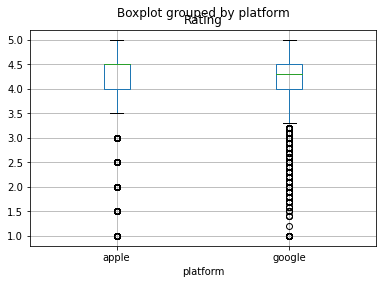

In [31]:
df.boxplot(by = "platform", column = ['Rating'])

Here we see the same information as in the analytical summary, but with a boxplot. Can you see how the boxplot is working here? If you need to revise your boxplots, check out this this [link](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps). 

## Stage 3 - Modelling

### 3a. Hypothesis formulation

Our **Null hypothesis** is just:

**H<sub>null</sub>**: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform).

The more interesting hypothesis is called the **Alternate hypothesis**:

**H<sub>alternative</sub>**: the observed difference in the average ratings of apple and google users is not due to chance (and is actually due to platform)

We're also going to pick a **significance level** of 0.05. 

### 3b. Getting the distribution of the data
Now that the hypotheses and significance level are defined, we can select a statistical test to determine which hypothesis to accept. 

There are many different statistical tests, all with different assumptions. You'll generate an excellent judgement about when to use which statistical tests over the Data Science Career Track course. But in general, one of the most important things to determine is the **distribution of the data**.   

In [32]:
# Create a subset of the column 'Rating' by the different platforms, split into 'apple' and 'google'
apple = df[df['platform']=='apple']['Rating']
google = df[df['platform']=='google']['Rating']

In [33]:
# Use stats.normaltest() method, for indication of normally distributed for apple data
apple_normal = stats.normaltest(apple)
apple_normal

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)

In [34]:
# Use stats.normaltest() method, for indication of normally distributed for google data
google_normal = stats.normaltest(google)
google_normal

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)

Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal. 

Since the p-values is 0 for both tests, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed. 

We can actually also check out the distribution of the data visually with a histogram. A normal distribution has the following visual characteristics:
    - symmetric
    - unimodal (one hump)
As well as a roughly identical mean, median and mode. 

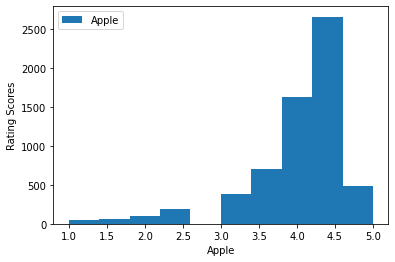

In [35]:
# Create a histogram of the apple reviews distribution
plt.hist(apple,label='Apple',bins=10)
plt.legend()
plt.xlabel('Apple')
plt.ylabel('Rating Scores')
plt.show()

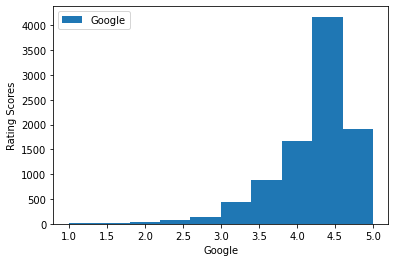

In [36]:
# Create a histogram of the google reviews distribution
plt.hist(google,label='Google',bins=10)
plt.legend()
plt.xlabel('Google')
plt.ylabel('Rating Scores')
plt.show()

### 3c. Permutation test
Since the data aren't normally distributed, we're using a *non-parametric* test here. This is simply a label for statistical tests used when the data aren't normally distributed. These tests are extraordinarily powerful due to how few assumptions we need to make.  

Check out more about permutations [here.](http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/)

In [37]:
# Create a column called `Permutation1`, and assign to it the result of permuting (shuffling) the Rating column
# This assignment will use our numpy object's random.permutation() method
df['Permutation1'] = np.random.permutation(df['Rating'])

# Call the describe() method on our permutation grouped by 'platform'. 
df.groupby(by='platform')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.137620,0.610776,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.132917,0.614431,1.0,4.0,4.3,4.5,5.0


In [38]:
# Lets compare with the previous analytical summary:
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


To test, create 10,000 permutations and compare means

In [39]:
# The difference in the means for Permutation1 (0.001103) now looks hugely different to our observed difference of 0.14206. 
# It's sure starting to look like our observed difference is significant, and that the Null is false; platform does impact on ratings
# But to be sure, let's create 10,000 permutations, calculate the mean ratings for Google and Apple apps and the difference between these for each one, and then take the average of all of these differences.
# Let's create a vector with the differences - that will be the distibution of the Null.

# First, make a list called difference.
differences = []

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
for i in range(10000):
    permutation = np.random.permutation(df['Rating'])
    differences.append(np.mean(permutation[df['platform']=='apple']) - np.mean(permutation[df['platform']=='google']))

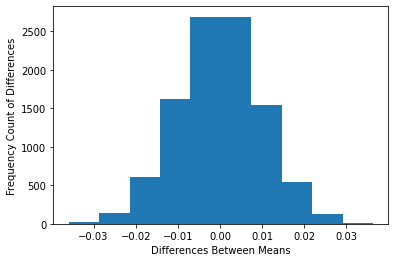

In [40]:
# Make a variable called 'histo', and assign to it the result of plotting a histogram of the difference list. 
histo = plt.hist(differences)
plt.xlabel('Differences Between Means')
plt.ylabel('Frequency Count of Differences')
plt.show()

In [41]:
# With variable obs_difference, show absolute result of the mean of our 'apple' & 'google variables'
obs_difference = abs(np.mean(apple)-np.mean(google))
obs_difference
# Print out this value; it should be 0.1420605474512291. 


0.14206054745123442

## Stage 4 -  Evaluating and concluding
### 4a. What is our conclusion?

In [42]:
'''
What do we know? 

Recall: The p-value of our observed data is just the proportion of the data given the null that's at least as extreme as that observed data.

As a result, we're going to count how many of the differences in our difference list are at least as extreme as our observed difference.

If less than or equal to 5% of them are, then we will reject the Null. 
'''
extremes = []
for i in range(len(differences)):
    if (differences[i] >= obs_difference) or (differences[i] <= -obs_difference):
        extremes.append(differences[i])
print(extremes)

[]


There were no differences from the 10000 sampling that were greater in magnitude than the observed difference.  Out p-value is 0

### 4b. What is our decision?
So actually, zero differences are at least as extreme as our observed difference!

So the p-value of our observed data is 0. 

It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the Null.

We conclude that platform does impact on ratings. Specifically, we should advise our client to integrate **only Google Play** into their operating system interface. 